In [1]:
#Connect with the database
import psycopg2
conn = psycopg2.connect(host="localhost", port = 5432, database="EmployeeSQL", user="postgres", password="postgres")

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#Get the salary data of the employees
salary = pd.read_sql('SELECT * FROM salaries', conn)
#view the sample of the salary data
salary.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [4]:
#get the titles of the employees
title = pd.read_sql('SELECT * FROM titles', conn)
#view the sample of the title data
title.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


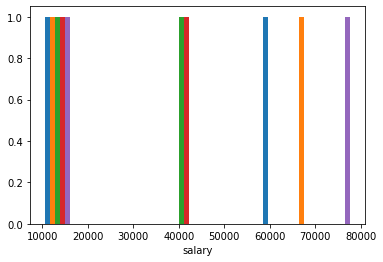

In [5]:
#Create a histogram to visualize the most common salary ranges for employees.
salary1 = salary.loc[:, ["emp_no", "salary"]].head()
plt.hist(salary1)
plt.xlabel('salary')
plt.show()

In [11]:
#Create a join to get title and salary in one dataframe
salary_title = pd.merge(salary, title, on = 'emp_no')
salary_title


,emp_no,salary,from_date_x,to_date_x,title,from_date_y,to_date_y
0,10001,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,65828,1996-08-03,1997-08-03,Staff,1996-08-03,9999-01-01
2,10003,40006,1995-12-03,1996-12-02,Senior Engineer,1995-12-03,9999-01-01
3,10004,40054,1986-12-01,1987-12-01,Engineer,1986-12-01,1995-12-01
4,10004,40054,1986-12-01,1987-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...
443303,499997,49597,1987-08-30,1988-08-29,Engineer,1987-08-30,1992-08-29
443304,499997,49597,1987-08-30,1988-08-29,Senior Engineer,1992-08-29,9999-01-01
443305,499998,40000,1993-12-27,1994-12-27,Senior Staff,1998-12-27,9999-01-01
443306,499998,40000,1993-12-27,1994-12-27,Staff,1993-12-27,1998-12-27


In [12]:
#groupby to get salary by titles
st_grouped = pd.DataFrame(st_df.groupby(['title']).mean()['salary'])
st_grouped

,salary
title,
Assistant Engineer,48493.204786
Engineer,48539.781423
Manager,51531.041667
Senior Engineer,48506.751806
Senior Staff,58503.286614
Staff,58465.271904
Technique Leader,48580.505772


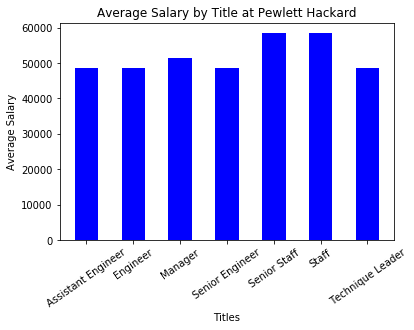

In [21]:
#Create a bar chart of average salary by title.
x_axis = np.arange(len(st_grouped))
y_axis = [48493, 48539, 51531, 48506, 58503, 58465, 48580]
plt.bar(x_axis, y_axis, color="b", width = 0.5)

labels = ['Assistant Engineer','Engineer','Manager','Senior Engineer','Senior Staff','Staff','Technique Leader']
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels ,rotation=35)

plt.title("Average Salary by Title at Pewlett Hackard")
plt.xlabel("Titles")
plt.ylabel("Average Salary")

plt.show()